In [ ]:
#melakukan pengecekan tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


In [17]:
#membuat direktori baru
import os
try:
   if not os.path.exists(os.path.dirname('dataset')):
       os.makedirs(os.path.dirname('dataset'))
except OSError as err:
   print(err)
''


[Errno 2] No such file or directory: ''


''

In [18]:
'''os.mkdir("dataset") #membuat directori dengan nama dataset
dataset_dir='dataset'''
dataset_dir='dataset'

In [19]:
#ekstrak file zip
import zipfile
ekstrak_file=zipfile.ZipFile('rockpaperscissors.zip','r')
ekstrak_file.extractall(dataset_dir) #hasil ekstark file zip ditampung dalam dir "dataset " dalam dataset_dir

In [ ]:
ekstrak_file.close()

In [20]:
#meisahkan direktori gunting batu dan kerta
directori=os.path.join(dataset_dir,'rockpaperscissors')
#diretori kertas
kertas_dir=os.path.join(directori,'paper')
#directori batu
batu_dir=os.path.join(directori,'rock')
#directori gunting
gunting_dir=os.path.join(directori,'scissors')

In [22]:
#mengecek isi data masing-masing dir
print(len(os.listdir(kertas_dir)))
file_kertas=os.listdir(kertas_dir)
print(len(os.listdir(batu_dir)))
file_batu=os.listdir(batu_dir)
print(len(os.listdir(gunting_dir)))
file_gunting=os.listdir(gunting_dir)

712
726
750


MENAMPILKAN GAMBAR GUNTING, BATU, DAN KERTAS DALAM SATU TAMPILAN

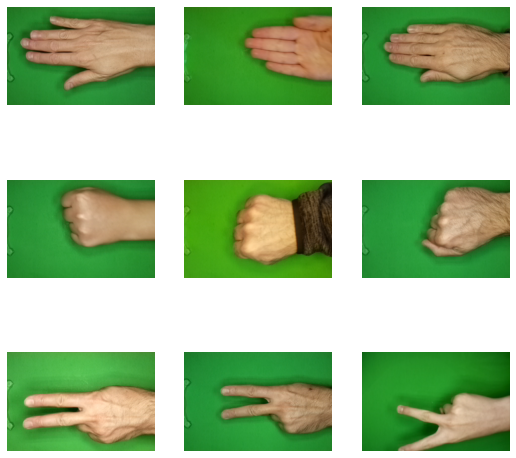

In [23]:
import matplotlib.pyplot as plt #mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows=3 # jumlah baris tampilan gambar
ncols=3 #jumlah kolom tampilan gambar

pic_index=0 #index awal untuk iterasi gambar

fig=plt.gcf()
fig.set_size_inches(ncols*3,nrows*3) #mengatur gambar output matplotlib
#gambr tampil kertas
gambr_kertas=[]
for fname in file_kertas[0:3]:
  gambr_kertas.append(os.path.join(kertas_dir,fname)) #menmapung file kertas sesuai index

#gambar tampil batu
gambr_batu=[]
for fname in file_batu[0:3]:
  gambr_kertas.append(os.path.join(batu_dir,fname)) #menmapung file batu sesuai index

#gambar tampil gunting
gambr_gunting=[]
for fname in file_gunting[0:3]:
  gambr_kertas.append(os.path.join(gunting_dir,fname)) #menmapung file gunting sesuai index


for i,img_path in enumerate(gambr_kertas+gambr_batu+gambr_gunting):
  sp=plt.subplot(nrows,ncols,i+1) #mengatur subplot dan indeknya mulai dari 1
  sp.axis('off') #tidak menmapilkan gridlines

  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()





MELAKUKAN AUGMENTASI SERTA PEMISAHAN DATA TRAINING DAN VALIDATION

In [126]:
import keras.preprocessing #import modul keras

from keras.preprocessing.image import ImageDataGenerator #mengimport processing untuk gambar


In [55]:
DATABSE_IMAGE=os.path.join(directori,'rps-cv-images') #meyiapkan folder utama
training_datagen=ImageDataGenerator(
    rescale=1./255, #menormalisasi data
    rotation_range=15, #menerapkan skenario rotasi ga,bar hingga 15 derajat
    width_shift_range=0.2,#menerapkan skenario pelebaran gambar hingga sebnayak 0.2 dari ukuran asli
    height_shift_range=0.2,#menerapkan skenario peninggian gambar hingga sebnayak 0.2 dari ukuran asli
    shear_range=0.2, #menerapkan skenario pemangkasan gambar hingga sebnayak 0.3 dari ukuran asli
    zoom_range=0.2, #menerapkan skenario zoom gambar hingga sebnayak 0.2 dari ukuran asli
    horizontal_flip=True, #menerapkan skenario putar balik gambar secara horizontal
    fill_mode='nearest',#mengisi piksel yang kosong dengan nilai piksel terdekat

    validation_split=0.4 #60% data training, 40%data validas
)

PEMISAHAN DATA MENGGUNAKAN IMAGE DATA GENERATOR BERDASARKAN FOLDER

In [56]:
# generator untuk data training
train_generator=training_datagen.flow_from_directory(
    DATABSE_IMAGE, #folder target untuk digeneralisasi
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
    class_mode='categorical', #menggunakan class categorical karena data label lebih dari 2 kelas yaitu batu gunting dan kertas, jika 2 kelas maka gunkana binary
    shuffle=True,
    subset="training" #memberikan identifikasi bhawa ini merupakan data training

)

#generator untuk data validasi
validation_generator=training_datagen.flow_from_directory(
    DATABSE_IMAGE, #folder target un tuk digeneralisasi
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
    class_mode='categorical', #menggunakan class categorical karena data label lebih dari 2 kelas yaitu batu gunting dan kertas, jika 2 kelas maka gunkana binary
    shuffle=True,
    subset="validation" #memberikan identifikasi bhawa ini merupakan data vlidasi

)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


MEMBANGUN MODEL JARINGAN SARAF TIRUAN MENGGUNAKAN SEQUANTIAL MODEL

In [104]:
model = tf.keras.models.Sequential([ #membentuk model sequential
    #konvolusi 1
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #konvolusi 2
    tf.keras.layers.Conv2D(32, (3,3), padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
     #konvolusi 3
    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     #konvolusi 4
    tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     #konvolusi 5
    tf.keras.layers.Conv2D(512, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     #mengubah data menjadi satu dimensi
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2), #drouput digunakan untuk mencegah overfiting pada data
    #hidden layer
    tf.keras.layers.Dense(64, activation='relu'), #hidden layer kedua dengan 64 neuron
    tf.keras.layers.Dropout(0.2),#drouput digunakan untuk mencegah overfiting pada data
    tf.keras.layers.Dense(128, activation='relu'), #hidden layer kedua dengan 128 neuron
    tf.keras.layers.Dropout(0.2),#drouput digunakan untuk mencegah overfiting pada data
    tf.keras.layers.Dense(512, activation='relu'), #hidden layer kedua dengan 512 neuron
    tf.keras.layers.Dropout(0.2),#drouput digunakan untuk mencegah overfiting pada data
    #output layer
    tf.keras.layers.Dense(3, activation='softmax') #softamx digunakan karena terdapat 3 kelas label yaitu batu,gunting,kertas

])

# New Section

In [105]:
#menampilkan summary model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 18, 18, 64)     

MELAKUKAN KOMPILASI MODEL

In [106]:
model.compile(loss='categorical_crossentropy', # loss function yang digunakan untuk klasifikasi ketegori lebih dari b2
              optimizer='adam',
              metrics=['accuracy']) #manmpilkan akurasi model training

MELATIH MODEL JARINGAN SARAF TIRUAN

In [107]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=22, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=4,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose =2)

Epoch 1/22
25/25 - 19s - loss: 1.1022 - accuracy: 0.3416 - val_loss: 1.0945 - val_accuracy: 0.3203 - 19s/epoch - 778ms/step
Epoch 2/22
25/25 - 19s - loss: 1.0765 - accuracy: 0.3812 - val_loss: 1.0107 - val_accuracy: 0.5078 - 19s/epoch - 772ms/step
Epoch 3/22
25/25 - 18s - loss: 0.8380 - accuracy: 0.5649 - val_loss: 0.6654 - val_accuracy: 0.6094 - 18s/epoch - 737ms/step
Epoch 4/22
25/25 - 19s - loss: 0.6471 - accuracy: 0.6857 - val_loss: 0.8285 - val_accuracy: 0.6016 - 19s/epoch - 743ms/step
Epoch 5/22
25/25 - 18s - loss: 0.5563 - accuracy: 0.7143 - val_loss: 0.6740 - val_accuracy: 0.7500 - 18s/epoch - 739ms/step
Epoch 6/22
25/25 - 19s - loss: 0.4763 - accuracy: 0.7948 - val_loss: 0.3753 - val_accuracy: 0.8594 - 19s/epoch - 743ms/step
Epoch 7/22
25/25 - 18s - loss: 0.4622 - accuracy: 0.8169 - val_loss: 0.4081 - val_accuracy: 0.8281 - 18s/epoch - 737ms/step
Epoch 8/22
25/25 - 18s - loss: 0.3590 - accuracy: 0.8519 - val_loss: 0.2772 - val_accuracy: 0.9141 - 18s/epoch - 736ms/step
Epoch 9/

Saving MPiImIdtqCEKxDbP.png to MPiImIdtqCEKxDbP (5).png
1/1 [==============================] - 0s 25ms/step
MPiImIdtqCEKxDbP.png
classes[0][0]:0.0
classes[0][1]:0.0
classes[0][2]:1.0
Gunting


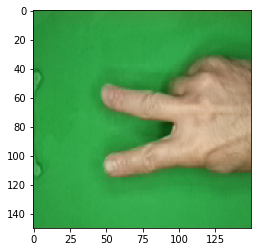

In [132]:
import numpy as np
import keras
import tensorflow
from google.colab import files #mengimport modul import file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload() #mengunggah gambar yang akan dikenali model
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.utils.load_img(path, target_size=(150,150)) #ubah ukuran gambar menajdi 100x100 piksel
 
  imgplot = plt.imshow(img) #menampilkan gambar yang diunggah
  x = keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=32 ) 
  print(fn)
  print(f'classes[0][0]:{classes[0][0]}')
  print(f'classes[0][1]:{classes[0][1]}')
  print(f'classes[0][2]:{classes[0][2]}')

  if (classes[0][0]==1.0 and classes[0][1]==0.0 and classes[0][2]==0.0):
   print('Kertas')
  elif (classes[0][0]==0.0 and classes[0][1]==1.0 and classes[0][2]==0.0):
   print('Batu')
  elif (classes[0][0]==0.0 and classes[0][1]==0.0 and classes[0][2]==1.0):
    print('Gunting')
  else:
    print('Gambar tidak dapat dideteksi')